In [1]:
using DataFrames, CSV, DelimitedFiles, Plots, FFTW
include("/home/kirk/Documents/research/CHANDRATest/DJM.jl")
pows8=CSV.read("cxc.fftinfo.all8")
testInd=381 #from checking_known_sources notebook

381

In [2]:
pows8[381,:]

,obsid,srcnum,startdate,exptime,ra,dec,freq,power
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
381,11982,7,55319.6,24894.2,12.6864,-73.2683,0.00145026,38.4637


In [3]:
#OBSID=11982, srcnum=7 pulled from claptrap server
data=readlines("11982_src_7.times")
#starts at 8, second thing in is timestamp
data[8]

"     1 389282621.9732664824    144 (     4254.7753906250,     4754.9458007812)"

In [4]:
test=data[8][8:27] #how to get just time
parse.(Float64,test) #convert string to float

3.892826219732665e8

In [5]:
function getFloatTimes(dataList)
    timeList=zeros(length(dataList)-7) #-7 because 1st 7 are bs
    for i=8:length(dataList) #real data starts at 8
        dat=dataList[i]
        time=parse.(Float64,dat[8:27]) #this is always where time values are
        timeList[i-7]=time #-7 to get back to 1
    end
    return timeList
end

getFloatTimes (generic function with 1 method)

In [6]:
testTimes=getFloatTimes(data)

409-element Array{Float64,1}:
 3.892826219732665e8 
 3.8928268793773127e8
 3.892830271834749e8 
 3.892830648774549e8 
 3.8928306801861244e8
 3.8928319680634135e8
 3.892832187944942e8 
 3.892832250768294e8 
 3.892832345003121e8 
 3.892832564884552e8 
 3.892832627707903e8 
 3.8928329104126847e8
 3.8928330988824403e8
 ⋮                   
 3.893068151573431e8 
 3.8930701933277464e8
 3.8930702561506283e8
 3.893071135675763e8 
 3.893071512614856e8 
 3.893071763907685e8 
 3.893072360728125e8 
 3.8930729261368805e8
 3.893073146018026e8 
 3.8930735857805204e8
 3.893074025543119e8 
 3.8930744338936305e8

In [7]:
testPeriod=pows8.freq[testInd]^-1

689.53126

In [8]:
dur=maximum(testTimes)-minimum(testTimes)
rescaledTimes=zeros(length(testTimes))
for i=1:length(rescaledTimes)
    rescaledTimes[i]=testTimes[i]-minimum(testTimes)
end

In [9]:
cycles=round(maximum(rescaledTimes)/testPeriod) #this is how many potential cycles there are
timeDel=3.24112 #s, got from other notebook but I think this is right (or at least close enough for this test)

3.24112

In [21]:
totalElapsed=maximum(rescaledTimes)/timeDel

7658.283586096198

In [30]:
bins=zeros(Int(ceil(totalElapsed)))
floor(maximum(rescaledTimes)/timeDel)+1

7659.0

In [31]:
for time in rescaledTimes
    place=Int(floor(time/timeDel))+1 #because we shifted everything to 0
    bins[place]+=1
end

In [32]:
bins

7659-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0

In [33]:
binsPerCycle=Int(ceil(testPeriod/timeDel))
stackedBins=zeros(binsPerCycle)

213-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [38]:
counter=1
for i=1:length(bins)
    currentVal=bins[i]
    currentTime=timeDel*(i-1) #start at 0
    stackedBins[counter]+=currentVal
    if i%length(stackedBins)==0 #new cycle
        counter=1
    else
        counter+=1
    end
end

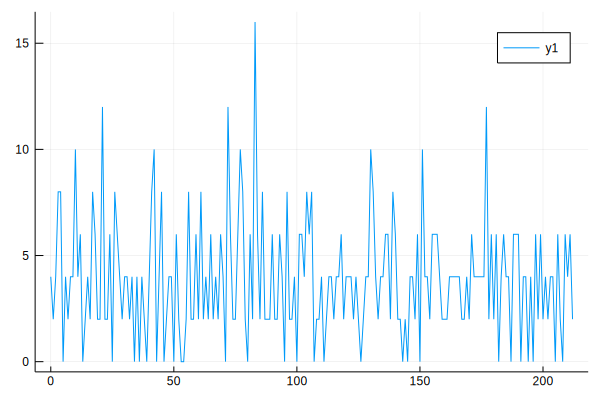

In [39]:
fauxX=range(0,stop=212,length=213)
plot(fauxX,stackedBins)

In [36]:
check=rfft(bins)

3830-element Array{Complex{Float64},1}:
               409.0 + 0.0im               
   27.58838705326215 + 14.877390997136795im
   18.50328590115415 + 25.156699961882328im
 -1.3627179553760111 - 6.349911925668019im 
   20.06488228646624 + 20.280816387903013im
   5.447638588550355 - 9.004949312907605im 
 -14.941870706039373 - 9.458716602204763im 
 -17.076189369972756 + 23.57631776891157im 
 -23.721641337402755 - 23.30562711442714im 
  6.9065329722246425 + 3.027160594680738im 
   0.643805029200383 + 11.135364705793936im
 -1.3079729168521865 - 3.2660128868188334im
  -25.50751061057526 + 14.893404006724987im
                     ⋮                     
  -19.95676204348695 - 12.213782741347641im
  -7.485316587460671 - 14.335025487292233im
  -2.247255289636568 - 2.550055429313664im 
  -27.49105556702858 + 12.448158430187853im
   5.094827513199839 + 8.056443013056374im 
  1.5214813821291138 + 3.0414666432095907im
  -5.221013839987657 + 16.988362890584476im
 -12.660267983453984 + 15.7408278441

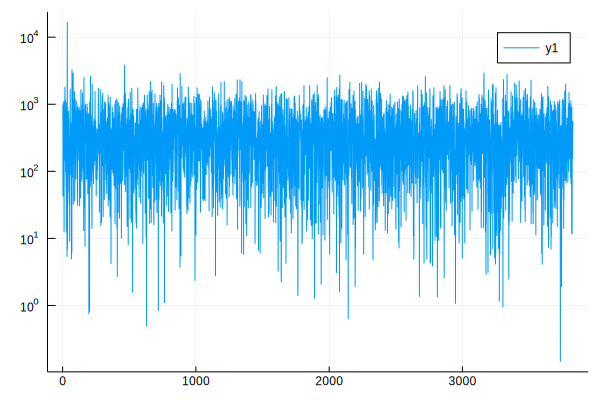

In [37]:
plot(abs.(check[2:end]).^2,yaxis=:log)

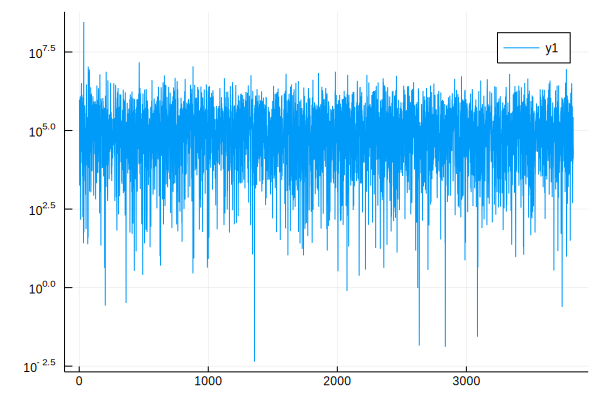

In [41]:
realfft=CSV.read("11982_src_7.fft",header=false)
plot((realfft.Column1[2:Int(ceil(end/2))].^2+realfft.Column2[2:Int(ceil(end/2))].^2),yaxis=:log)

In [40]:
totalElapsed/213

35.95438303331548